In [18]:
import pandas as pd

file_path = 'C:\IRVINE\HW1\collected_books.csv'
books_df = pd.read_csv(file_path)

books_df.head()


<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\이태홍\AppData\Local\Temp\ipykernel_21892\871872094.py:3: SyntaxWarning: invalid escape sequence '\I'
  file_path = 'C:\IRVINE\HW1\collected_books.csv'


,title,author,publisher,publish_date,original_price,sale_price
0,요한복음에 나타난 아가페 사랑 신학 IX,박종욱 저,ABC CONSULTING,2023년 12월 29일,"18,000원","18,000"
1,칼빈주의 정통과 이단,김학관 저,BOOKK(부크크),2024년 01월 02일,"14,400원","14,400"
2,당신의 꿈이 꿈해몽과 맞지 않는 이유,양산의영웅 저,BOOKK(부크크),2024년 01월 01일,"11,000원","11,000"
3,숫자가 말하는 운세 2,임점화淡 저,BOOKK(부크크),2023년 12월 29일,"7,400원","7,400"
4,Messengers of Light 빛의 전달자들,"홍아리엘, 김광호, 박모세, 고정화, 김영희 저 외 6명 정보 더 보기/감추기",BOOKK(부크크),2023년 12월 29일,"14,300원","14,300"



## Data Cleaning and Preparation


In [19]:
books_df['original_price'] = books_df['original_price'].str.replace('원', '').str.replace(',', '').astype(float)
books_df['sale_price'] = books_df['sale_price'].str.replace('원', '').str.replace(',', '').astype(float)

books_df['publish_date'] = pd.to_datetime(books_df['publish_date'], format='%Y년 %m월 %d일', errors='coerce')

books_df['discount_amount'] = books_df['original_price'] - books_df['sale_price']

books_df.head()


,title,author,publisher,publish_date,original_price,sale_price,discount_amount
0,요한복음에 나타난 아가페 사랑 신학 IX,박종욱 저,ABC CONSULTING,2023-12-29,18000.0,18000.0,0.0
1,칼빈주의 정통과 이단,김학관 저,BOOKK(부크크),2024-01-02,14400.0,14400.0,0.0
2,당신의 꿈이 꿈해몽과 맞지 않는 이유,양산의영웅 저,BOOKK(부크크),2024-01-01,11000.0,11000.0,0.0
3,숫자가 말하는 운세 2,임점화淡 저,BOOKK(부크크),2023-12-29,7400.0,7400.0,0.0
4,Messengers of Light 빛의 전달자들,"홍아리엘, 김광호, 박모세, 고정화, 김영희 저 외 6명 정보 더 보기/감추기",BOOKK(부크크),2023-12-29,14300.0,14300.0,0.0



## Basic Statistical Analysis


In [20]:
stats = books_df[['original_price', 'sale_price', 'discount_amount']].describe()
stats


,original_price,sale_price,discount_amount
count,1426.000000,1426.000000,1426.000000
mean,37500.743338,34757.019635,2743.723703
std,58969.953732,53645.285672,5910.681056
min,1000.000000,950.000000,0.000000
25%,13125.000000,12600.000000,0.000000
50%,18950.000000,17820.000000,1350.000000
75%,32000.000000,29700.000000,2237.500000
max,720000.000000,648000.000000,72000.000000



## Data Visualization


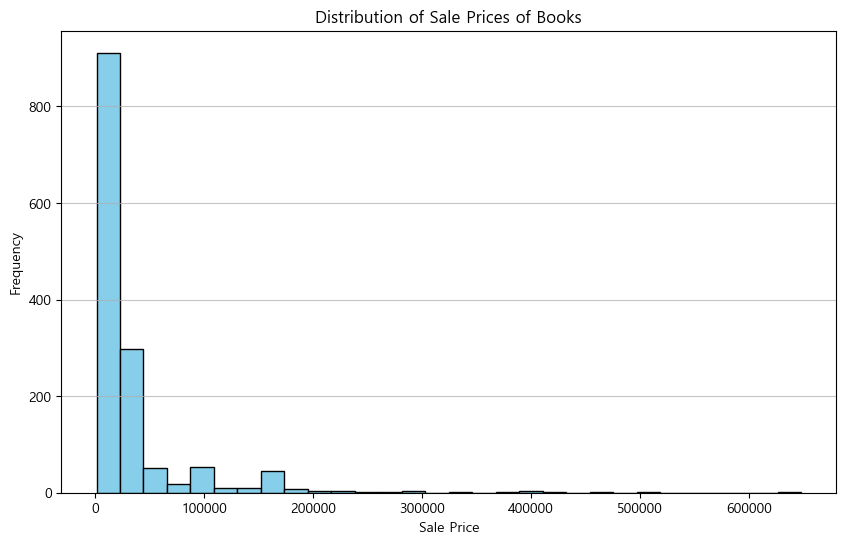

In [16]:

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Creating a histogram for the sale prices
plt.figure(figsize=(10, 6))
plt.hist(books_df['sale_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Prices of Books')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


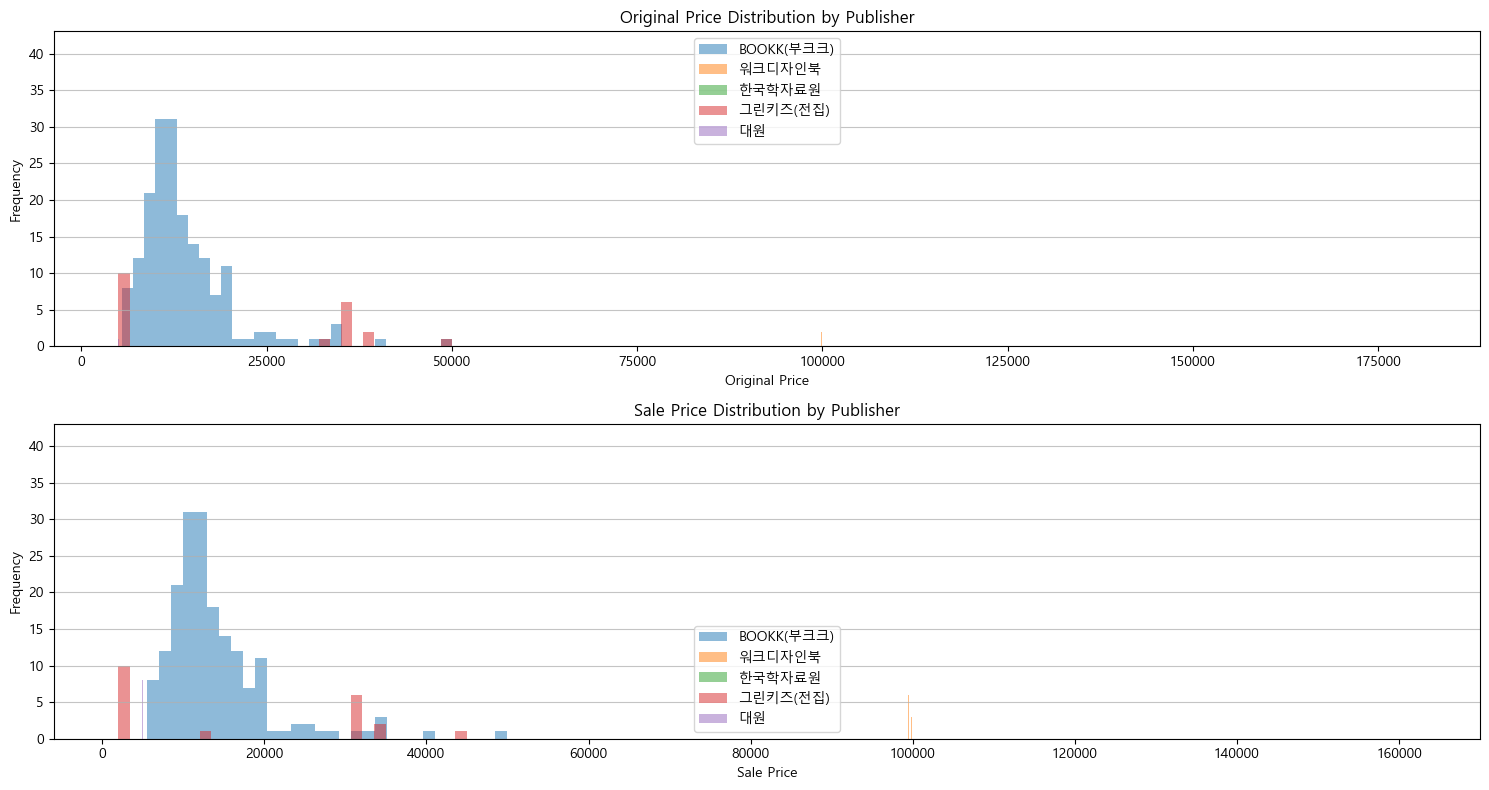

In [21]:
top_publishers = books_df['publisher'].value_counts().head(5).index
filtered_books_df = books_df[books_df['publisher'].isin(top_publishers)]

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1) 
for publisher in top_publishers:
    subset = filtered_books_df[filtered_books_df['publisher'] == publisher]
    plt.hist(subset['original_price'], bins=30, alpha=0.5, label=publisher)
plt.title('Original Price Distribution by Publisher')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 1, 2) 
for publisher in top_publishers:
    subset = filtered_books_df[filtered_books_df['publisher'] == publisher]
    plt.hist(subset['sale_price'], bins=30, alpha=0.5, label=publisher)
plt.title('Sale Price Distribution by Publisher')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()


In [29]:
# Calculating average price for each publisher
average_price_per_publisher = books_df.groupby('publisher')['sale_price'].mean()

# Finding the most expensive, cheapest, and median priced book for each publisher
def get_extreme_books(df, col):
    return {
        'most_expensive': df.loc[df[col].idxmax()],
        'cheapest': df.loc[df[col].idxmin()],
        'median': df.loc[(df[col] - df[col].median()).abs().idxmin()]
    }

extreme_books_per_publisher = books_df.groupby('publisher').apply(get_extreme_books, 'sale_price')

average_price_per_publisher, extreme_books_per_publisher.head()

# Creating a csv file for the extreme books and average 
average_price_per_publisher.to_csv('average_price_per_publisher.csv', header=True)
extreme_books_per_publisher.to_csv('extreme_books_per_publisher.csv', header=True)




C:\Users\이태홍\AppData\Local\Temp\ipykernel_21892\3030180972.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  extreme_books_per_publisher = books_df.groupby('publisher').apply(get_extreme_books, 'sale_price')
